<h1>After Cleaning and Feature Engineering: Modeling </h1>

- import data frames

In [307]:
import pandas as pd
import numpy as np

DATA_PATH ='./data'
df_fights = pd.read_csv(DATA_PATH+'/df_fights.csv')
df_fighter_history = pd.read_csv(DATA_PATH+'/df_fighter_history.csv')
df_fights_train = pd.read_csv(DATA_PATH+'/df_fights_train.csv')
df_fighter_history_train = pd.read_csv(DATA_PATH+'/df_fighter_history_train.csv')
df_train = pd.read_csv(DATA_PATH+'/df_train.csv')

<h4>Implement Random Forest Classifier</h4>

In [308]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df_train[['R_KD', 'B_KD', 'R_SIG_STR_pct',
       'B_SIG_STR_pct', 'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT',
       'R_PASS', 'B_PASS', 'R_REV', 'B_REV',
       'location', 'R_SIG_STR._ATT', 'R_SIG_STR._LANDED', 'B_SIG_STR._ATT',
       'B_SIG_STR._LANDED', 'R_TOTAL_STR._ATT', 'R_TOTAL_STR._LANDED',
       'B_TOTAL_STR._ATT', 'B_TOTAL_STR._LANDED', 'R_TD_ATT', 'R_TD_LANDED',
       'B_TD_ATT', 'B_TD_LANDED', 'R_HEAD_ATT', 'R_HEAD_LANDED', 'B_HEAD_ATT',
       'B_HEAD_LANDED', 'R_BODY_ATT', 'R_BODY_LANDED', 'B_BODY_ATT',
       'B_BODY_LANDED', 'R_LEG_ATT', 'R_LEG_LANDED', 'B_LEG_ATT',
       'B_LEG_LANDED', 'R_DISTANCE_ATT', 'R_DISTANCE_LANDED', 'B_DISTANCE_ATT',
       'B_DISTANCE_LANDED', 'R_CLINCH_ATT', 'R_CLINCH_LANDED', 'B_CLINCH_ATT',
       'B_CLINCH_LANDED', 'R_GROUND_ATT', 'R_GROUND_LANDED', 'B_GROUND_ATT',
       'B_GROUND_LANDED', 'title_bout',
       'total_time_fought(sec)', 'no_of_rounds', 'R_Height',
       'R_Weight', 'R_Reach', 'R_KO_win_%', 'R_Sub_win_%', 'R_Stance_Orthodox',
       'R_Stance_Southpaw', 'R_num_fights', 'R_record', 'R_age', 'B_Height',
       'B_Weight', 'B_Reach', 'B_KO_win_%', 'B_Sub_win_%', 'B_Stance_Orthodox',
       'B_Stance_Southpaw', 'B_num_fights', 'B_record', 'B_age', 'Bantamweight', 'Featherweight',
       'Flyweight', 'Heavyweight', 'Light Heavyweight', 'Lightweight',
       'Middleweight', 'Welterweight', 'Women\'s Bantamweight',
       'Women\'s Featherweight', 'Women\'s Flyweight', 'Women\'s Strawweight']]  # Features

y=df_train['Red_win']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [309]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8791348600508906


In [310]:
feature_importance = pd.Series(clf.feature_importances_,index=['R_KD', 'B_KD', 'R_SIG_STR_pct',
       'B_SIG_STR_pct', 'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT',
       'R_PASS', 'B_PASS', 'R_REV', 'B_REV',
       'location', 'R_SIG_STR._ATT', 'R_SIG_STR._LANDED', 'B_SIG_STR._ATT',
       'B_SIG_STR._LANDED', 'R_TOTAL_STR._ATT', 'R_TOTAL_STR._LANDED',
       'B_TOTAL_STR._ATT', 'B_TOTAL_STR._LANDED', 'R_TD_ATT', 'R_TD_LANDED',
       'B_TD_ATT', 'B_TD_LANDED', 'R_HEAD_ATT', 'R_HEAD_LANDED', 'B_HEAD_ATT',
       'B_HEAD_LANDED', 'R_BODY_ATT', 'R_BODY_LANDED', 'B_BODY_ATT',
       'B_BODY_LANDED', 'R_LEG_ATT', 'R_LEG_LANDED', 'B_LEG_ATT',
       'B_LEG_LANDED', 'R_DISTANCE_ATT', 'R_DISTANCE_LANDED', 'B_DISTANCE_ATT',
       'B_DISTANCE_LANDED', 'R_CLINCH_ATT', 'R_CLINCH_LANDED', 'B_CLINCH_ATT',
       'B_CLINCH_LANDED', 'R_GROUND_ATT', 'R_GROUND_LANDED', 'B_GROUND_ATT',
       'B_GROUND_LANDED', 'title_bout',
       'total_time_fought(sec)', 'no_of_rounds', 'R_Height',
       'R_Weight', 'R_Reach', 'R_KO_win_%', 'R_Sub_win_%', 'R_Stance_Orthodox',
       'R_Stance_Southpaw', 'R_num_fights', 'R_record', 'R_age', 'B_Height',
       'B_Weight', 'B_Reach', 'B_KO_win_%', 'B_Sub_win_%', 'B_Stance_Orthodox',
       'B_Stance_Southpaw', 'B_num_fights', 'B_record', 'B_age', 'Bantamweight', 'Featherweight',
       'Flyweight', 'Heavyweight', 'Light Heavyweight', 'Lightweight',
       'Middleweight', 'Welterweight', 'Women\'s Bantamweight',
       'Women\'s Featherweight', 'Women\'s Flyweight', 'Women\'s Strawweight']).sort_values(ascending=False)

In [311]:
feature_importance[feature_importance > 0.01]

B_GROUND_LANDED        0.052917
R_GROUND_ATT           0.044953
B_KD                   0.044501
B_HEAD_LANDED          0.043452
R_GROUND_LANDED        0.040015
B_GROUND_ATT           0.035687
R_TOTAL_STR._LANDED    0.034763
B_SIG_STR._LANDED      0.028406
R_HEAD_LANDED          0.027756
B_TOTAL_STR._LANDED    0.026859
B_SIG_STR_pct          0.025787
R_KD                   0.025739
R_SIG_STR_pct          0.021519
B_PASS                 0.021391
R_SIG_STR._LANDED      0.019959
B_TOTAL_STR._ATT       0.017301
R_PASS                 0.017196
R_TOTAL_STR._ATT       0.017020
R_HEAD_ATT             0.016808
R_SUB_ATT              0.016660
B_DISTANCE_LANDED      0.015081
R_TD_pct               0.014615
B_HEAD_ATT             0.013985
B_SUB_ATT              0.013810
R_SIG_STR._ATT         0.013459
B_SIG_STR._ATT         0.013459
R_DISTANCE_LANDED      0.013003
R_age                  0.012921
B_age                  0.012509
B_DISTANCE_ATT         0.011623
B_TD_pct               0.011107
R_DISTAN

In [312]:
X2=df_train[['location','title_bout','R_Height',
       'R_Weight', 'R_Reach', 'R_KO_win_%', 'R_Sub_win_%', 'R_Stance_Orthodox',
       'R_Stance_Southpaw', 'R_num_fights', 'R_record', 'R_age', 'B_Height',
       'B_Weight', 'B_Reach', 'B_KO_win_%', 'B_Sub_win_%', 'B_Stance_Orthodox',
       'B_Stance_Southpaw', 'B_num_fights', 'B_record', 'B_age', 'Bantamweight', 'Featherweight',
       'Flyweight', 'Heavyweight', 'Light Heavyweight', 'Lightweight',
       'Middleweight', 'Welterweight', 'Women\'s Bantamweight',
       'Women\'s Featherweight', 'Women\'s Flyweight', 'Women\'s Strawweight']]  # Features

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2) # 80% training and 20% test

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf2=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(X_train,y_train)

y_pred=clf2.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6348600508905853


No handles with labels found to put in legend.


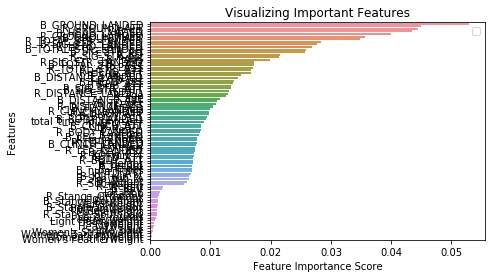

In [313]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_importance, y=feature_importance.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Create df_fights_train and df_fighter_history_train dataframes with estimated stats
- will be pulling much more from df_fighter_history when calculating the estimates data frame
- creating data frame of estimated fighter stats
    - avg. from all fights
    - avg. from last 5 fights
    - values from last fight

In [314]:
df_fights_train_est = df_fights[['R_fighter', 'B_fighter','win_by', 'last_round', 'date',
       'location','title_bout', 'weight_class', 
       'Red_win']]

In [315]:
df_fighter_history_train_est = df_fighter_history[['fighter_name', 'Height', 
                            'Weight', 'Reach', 'Stance', 'DOB', 'win_by',
                            'date','win',
       'KD','SIG_STR_pct', 'TD_pct', 'SUB_ATT', 'PASS', 'REV', 'SIG_STR._ATT',
       'SIG_STR._LANDED', 'TOTAL_STR._ATT', 'TOTAL_STR._LANDED', 'TD_ATT',
       'TD_LANDED', 'HEAD_ATT', 'HEAD_LANDED', 'BODY_ATT', 'BODY_LANDED',
       'LEG_ATT', 'LEG_LANDED', 'DISTANCE_ATT', 'DISTANCE_LANDED',
       'CLINCH_ATT', 'CLINCH_LANDED', 'GROUND_ATT', 'GROUND_LANDED',
       'total_time_fought(sec)', 'no_of_rounds']]

- first merge for red fighter estimates

In [316]:
df_train_est = pd.merge(df_fights_train_est, df_fighter_history_train_est, left_on='R_fighter',right_on='fighter_name',sort=False)

In [317]:
df_train_est = df_train_est[df_train_est['date_x'] > df_train_est['date_y']]

In [318]:
df_train_est = pd.concat([df_train_est, pd.get_dummies(df_train_est['win_by_y'])], axis=1)
df_train_est.drop(columns=['win_by_y','Other'], inplace=True)
df_train_est.rename(columns={'date_x':'date', 'KO':'KO_win_%', 'Submission':'Sub_win_%'}, inplace=True)

df_train_est = pd.concat([df_train_est, pd.get_dummies(df_train_est['Stance'])], axis=1)
df_train_est.drop(columns=['Stance','Switch','Open Stance','Sideways'], inplace=True)
df_train_est.rename(columns={'Orthodox':'R_Stance_Orthodox', 
                         'Southpaw':'R_Stance_Southpaw',
                         'Height':'R_Height',
                         'Weight':'R_Weight',
                         'Reach':'R_Reach'}, inplace=True)

In [319]:
df_train_est['date_y']= pd.to_datetime(df_train_est['date_y'])
df_train_est['date']= pd.to_datetime(df_train_est['date']) 
df_train_est['DOB']= pd.to_datetime(df_train_est['DOB']) 

In [320]:
df_train_est['R_num_fights'] = df_train_est.groupby(['R_fighter','date'])['date'].transform('count')

df_train_est['R_num_wins'] = df_train_est.groupby(['R_fighter','date'])['win'].transform('sum')

df_train_est['R_record'] = df_train_est['R_num_wins']/df_train_est['R_num_fights']

df_train_est['fight_rank'] = df_train_est.groupby(['R_fighter','date'])['date_y'].rank(ascending=False, method='first')

df_train_est = df_train_est[df_train_est['fight_rank']<=5]

df_train_est.drop(columns=['win','R_num_wins','date_y','fighter_name','fight_rank'], inplace=True)

In [321]:
df_train_est['R_age'] = df_train_est['date'] - df_train_est['DOB']
df_train_est['R_age'] = df_train_est['R_age']/np.timedelta64(1,'Y')
df_train_est['R_age'].fillna(df_train_est['R_age'].mean(), inplace=True)

df_train_est.drop(columns=['DOB'], inplace=True)

In [322]:
est_columns = ['KD', 'SIG_STR_pct', 'TD_pct', 'SUB_ATT', 'PASS', 'REV',
       'SIG_STR._ATT', 'SIG_STR._LANDED', 'TOTAL_STR._ATT',
       'TOTAL_STR._LANDED', 'TD_ATT', 'TD_LANDED', 'HEAD_ATT', 'HEAD_LANDED',
       'BODY_ATT', 'BODY_LANDED', 'LEG_ATT', 'LEG_LANDED', 'DISTANCE_ATT',
       'DISTANCE_LANDED', 'CLINCH_ATT', 'CLINCH_LANDED', 'GROUND_ATT',
       'GROUND_LANDED', 'total_time_fought(sec)', 'no_of_rounds', 'KO_win_%',
       'Sub_win_%']

In [323]:
df_train_est[est_columns] = df_train_est.groupby(['R_fighter', 'B_fighter', 'win_by_x', 'last_round', 'date', 'location',
       'title_bout', 'weight_class', 'Red_win', 'R_Height', 'R_Weight',
       'R_Reach', 'R_Stance_Orthodox', 'R_Stance_Southpaw', 'R_num_fights',
       'R_record', 'R_age'])[est_columns].transform('mean')

df_train_est = df_train_est.drop_duplicates()

df_train_est.rename(columns={'KD':'R_KD',                        
                             'SIG_STR_pct':'R_SIG_STR_pct',
                             'TD_pct':'R_TD_pct',
                             'SUB_ATT':'R_SUB_ATT',
                             'PASS':'R_PASS',
                             'REV':'R_REV',
                           'SIG_STR._ATT':'R_SIG_STR._ATT',
                             'SIG_STR._LANDED':'R_SIG_STR._LANDED',
                             'TOTAL_STR._ATT':'R_TOTAL_STR._ATT',
                           'TOTAL_STR._LANDED':'R_TOTAL_STR._LANDED',
                             'TD_ATT':'R_TD_ATT',
                             'TD_LANDED':'R_TD_LANDED',
                             'HEAD_ATT':'R_HEAD_ATT',
                             'HEAD_LANDED':'R_HEAD_LANDED',
                           'BODY_ATT':'R_BODY_ATT',
                             'BODY_LANDED':'R_BODY_LANDED',
                             'LEG_ATT':'R_LEG_ATT',
                             'LEG_LANDED':'R_LEG_LANDED',
                             'DISTANCE_ATT':'R_DISTANCE_ATT',
                           'DISTANCE_LANDED':'R_DISTANCE_LANDED',
                             'CLINCH_ATT':'R_CLINCH_ATT',
                             'CLINCH_LANDED':'R_CLINCH_LANDED', 
                             'GROUND_ATT':'R_GROUND_ATT',
                           'GROUND_LANDED':'R_GROUND_LANDED',
                             'total_time_fought(sec)':'R_total_time_fought(sec)',
                             'no_of_rounds':'R_no_of_rounds',
                             'KO_win_%':'R_KO_win_%',
                           'Sub_win_%':'R_Sub_win_%'}, inplace=True)

In [324]:
df_train_est[df_train_est['R_fighter']=='Kamaru Usman']

,R_fighter,B_fighter,win_by_x,last_round,date,location,title_bout,weight_class,Red_win,R_Height,...,R_GROUND_LANDED,R_total_time_fought(sec),R_no_of_rounds,R_KO_win_%,R_Sub_win_%,R_Stance_Orthodox,R_Stance_Southpaw,R_num_fights,R_record,R_age
8347,Kamaru Usman,Colby Covington,KO,5,2019-12-14,1,1,Welterweight,1,72.0,...,26.00,1113.60,4.20,0.2,0.00,0,0,10,1.0,32.594783
8359,Kamaru Usman,Emil Meek,Other,3,2018-01-14,0,0,Welterweight,1,72.0,...,22.80,753.60,3.00,0.2,0.00,0,0,6,1.0,30.680986
8371,Kamaru Usman,Sergio Moraes,KO,1,2017-09-16,0,0,Welterweight,1,72.0,...,24.00,795.80,3.20,0.0,0.20,0,0,5,1.0,30.352437
8383,Kamaru Usman,Sean Strickland,Other,3,2017-04-08,0,0,Welterweight,1,72.0,...,20.25,769.75,3.25,0.0,0.25,0,0,4,1.0,29.911634
8395,Kamaru Usman,Alexander Yakovlev,Other,3,2016-07-23,0,0,Welterweight,1,72.0,...,16.00,639.50,3.50,0.0,0.50,0,0,2,1.0,29.202516
8407,Kamaru Usman,Leon Edwards,Other,3,2015-12-19,0,0,Welterweight,1,72.0,...,7.00,379.00,4.00,0.0,1.00,0,0,1,1.0,28.608390


- repeat steps for blue fighter

In [325]:
df_train_est = pd.merge(df_train_est, df_fighter_history_train_est, left_on='B_fighter',right_on='fighter_name',sort=False)

df_train_est['date_y']= pd.to_datetime(df_train_est['date_y'])
df_train_est['date_x']= pd.to_datetime(df_train_est['date_x']) 
df_train_est['DOB']= pd.to_datetime(df_train_est['DOB']) 

df_train_est = df_train_est[df_train_est['date_x'] > df_train_est['date_y']]


df_train_est = pd.concat([df_train_est, pd.get_dummies(df_train_est['win_by'])], axis=1)
df_train_est.drop(columns=['win_by','Other'], inplace=True)
df_train_est.rename(columns={'date_x':'date', 'KO':'KO_win_%', 'Submission':'Sub_win_%'}, inplace=True)

df_train_est = pd.concat([df_train_est, pd.get_dummies(df_train_est['Stance'])], axis=1)
df_train_est.drop(columns=['Stance','Switch','Open Stance','Sideways'], inplace=True)
df_train_est.rename(columns={'Orthodox':'B_Stance_Orthodox', 
                         'Southpaw':'B_Stance_Southpaw',
                         'Height':'B_Height',
                         'Weight':'B_Weight',
                         'Reach':'B_Reach'}, inplace=True)





df_train_est['B_num_fights'] = df_train_est.groupby(['B_fighter','date'])['date'].transform('count')

df_train_est['B_num_wins'] = df_train_est.groupby(['B_fighter','date'])['win'].transform('sum')

df_train_est['B_record'] = df_train_est['B_num_wins']/df_train_est['B_num_fights']

df_train_est['fight_rank'] = df_train_est.groupby(['B_fighter','date'])['date_y'].rank(ascending=False, method='first')

df_train_est = df_train_est[df_train_est['fight_rank']<=5]

df_train_est.drop(columns=['win','B_num_wins','date_y','fighter_name','fight_rank'], inplace=True)


df_train_est['B_age'] = df_train_est['date'] - df_train_est['DOB']
df_train_est['B_age'] = df_train_est['B_age']/np.timedelta64(1,'Y')
df_train_est['B_age'].fillna(df_train_est['B_age'].mean(), inplace=True)

df_train_est.drop(columns=['DOB'], inplace=True)


est_columns = ['KD', 'SIG_STR_pct', 'TD_pct', 'SUB_ATT', 'PASS', 'REV',
       'SIG_STR._ATT', 'SIG_STR._LANDED', 'TOTAL_STR._ATT',
       'TOTAL_STR._LANDED', 'TD_ATT', 'TD_LANDED', 'HEAD_ATT', 'HEAD_LANDED',
       'BODY_ATT', 'BODY_LANDED', 'LEG_ATT', 'LEG_LANDED', 'DISTANCE_ATT',
       'DISTANCE_LANDED', 'CLINCH_ATT', 'CLINCH_LANDED', 'GROUND_ATT',
       'GROUND_LANDED', 'total_time_fought(sec)', 'no_of_rounds', 'KO_win_%',
       'Sub_win_%']



df_train_est[est_columns] = df_train_est.groupby(['R_fighter', 'B_fighter', 'win_by_x', 'last_round', 'date', 'location',
       'title_bout', 'weight_class', 'Red_win', 'B_Height', 'B_Weight',
       'B_Reach', 'B_Stance_Orthodox', 'B_Stance_Southpaw', 'B_num_fights',
       'B_record', 'B_age'])[est_columns].transform('mean')

df_train_est = df_train_est.drop_duplicates()

df_train_est.rename(columns={'KD':'B_KD',                        
                             'SIG_STR_pct':'B_SIG_STR_pct',
                             'TD_pct':'B_TD_pct',
                             'SUB_ATT':'B_SUB_ATT',
                             'PASS':'B_PASS',
                             'REV':'B_REV',
                           'SIG_STR._ATT':'B_SIG_STR._ATT',
                             'SIG_STR._LANDED':'B_SIG_STR._LANDED',
                             'TOTAL_STR._ATT':'B_TOTAL_STR._ATT',
                           'TOTAL_STR._LANDED':'B_TOTAL_STR._LANDED',
                             'TD_ATT':'B_TD_ATT',
                             'TD_LANDED':'B_TD_LANDED',
                             'HEAD_ATT':'B_HEAD_ATT',
                             'HEAD_LANDED':'B_HEAD_LANDED',
                           'BODY_ATT':'B_BODY_ATT',
                             'BODY_LANDED':'B_BODY_LANDED',
                             'LEG_ATT':'B_LEG_ATT',
                             'LEG_LANDED':'B_LEG_LANDED',
                             'DISTANCE_ATT':'B_DISTANCE_ATT',
                           'DISTANCE_LANDED':'B_DISTANCE_LANDED',
                             'CLINCH_ATT':'B_CLINCH_ATT',
                             'CLINCH_LANDED':'B_CLINCH_LANDED', 
                             'GROUND_ATT':'B_GROUND_ATT',
                           'GROUND_LANDED':'B_GROUND_LANDED',
                             'total_time_fought(sec)':'B_total_time_fought(sec)',
                             'no_of_rounds':'B_no_of_rounds',
                             'KO_win_%':'B_KO_win_%',
                           'Sub_win_%':'B_Sub_win_%'}, inplace=True)

In [327]:
df_train_est = pd.concat([df_train_est, pd.get_dummies(df_train_est['weight_class'])], axis=1)
df_train_est.drop(columns=['weight_class','Open Weight','Catch Weight'], inplace=True)
df_train_est.drop(columns=['win_by_x','last_round'], inplace=True)

In [329]:
df_train_est[df_train_est['R_fighter']=='Kamaru Usman']

,R_fighter,B_fighter,date,location,title_bout,Red_win,R_Height,R_Weight,R_Reach,R_KD,...,Flyweight,Heavyweight,Light Heavyweight,Lightweight,Middleweight,Welterweight,Women's Bantamweight,Women's Featherweight,Women's Flyweight,Women's Strawweight
860,Kamaru Usman,Colby Covington,2019-12-14,1,1,1,72.0,170.0,76.0,0.4,...,0,0,0,0,0,1,0,0,0,0
1684,Kamaru Usman,Alexander Yakovlev,2016-07-23,0,0,1,72.0,170.0,76.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4912,Kamaru Usman,Sean Strickland,2017-04-08,0,0,1,72.0,170.0,76.0,0.0,...,0,0,0,0,0,1,0,0,0,0
9153,Kamaru Usman,Emil Meek,2018-01-14,0,0,1,72.0,170.0,76.0,0.4,...,0,0,0,0,0,1,0,0,0,0
16572,Kamaru Usman,Leon Edwards,2015-12-19,0,0,1,72.0,170.0,76.0,0.0,...,0,0,0,0,0,1,0,0,0,0
21315,Kamaru Usman,Sergio Moraes,2017-09-16,0,0,1,72.0,170.0,76.0,0.2,...,0,0,0,0,0,1,0,0,0,0
